# Split Data by Founded Year


### Split Method

### Drop columns

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold,RFECV
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,RepeatedStratifiedKFold,StratifiedKFold
from imblearn.over_sampling import SMOTE

startup_df = pd.read_csv("startup_df.csv")


In [3]:
startup_df.head()

,name,market,funding_total_usd,country_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,...,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,status_binary,total_investment
0,#waywire,Other,"17,50,000",USA,New York City,New York,1.0,6.0,2.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.079452,0.079452,1,1750000.0
1,1000memories,Curated Web,"25,35,000",USA,SF Bay Area,San Francisco,2.0,7.0,3.0,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.630137,1,2535000.0
2,100Plus,Analytics,"12,50,000",USA,SF Bay Area,San Francisco,2.0,9.0,3.0,2011.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.128767,0.205479,1,1250000.0
3,10BestThings,Curated Web,"50,000",USA,Cleveland,Cleveland,1.0,4.0,2.0,2009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,50000.0
4,12Society,E-Commerce,-,USA,Los Angeles,West Hollywood,1.0,1.0,1.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.260274,0.260274,1,0.0


In [4]:
startup_df.columns

Index(['name', 'market', 'funding_total_usd', 'country_code', 'region', 'city',
       'funding_rounds', 'founded_month', 'founded_quarter', 'founded_year',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'age_first_funding', 'age_last_funding', 'status_binary',
       'total_investment'],
      dtype='object')

## Split data by founded year

In [15]:
startup_df.founded_year.describe()

count    3851.000000
mean     2006.351078
std         4.142129
min      1995.000000
25%      2004.000000
50%      2007.000000
75%      2010.000000
max      2014.000000
Name: founded_year, dtype: float64

In [30]:
drop_cols = ['name', 'country_code', 'region', 'city',
        'post_ipo_equity', 'post_ipo_debt',
       'round_G', 'round_H',
        'age_last_funding', 'status_binary', 'funding_total_usd'
]

In [31]:
## split train and test

train = startup_df[startup_df.founded_year <= 2010]
test = startup_df[startup_df.founded_year > 2010]

In [42]:
train.to_csv('crunchbase_train.csv', index=False)
test.to_csv('crunchbase_test.csv', index=False)

In [32]:
test.status_binary.value_counts()

0    308
1    289
Name: status_binary, dtype: int64

In [33]:
X_train = train.drop(drop_cols, axis=1)
y_train = train['status_binary']
X_test = test.drop(drop_cols, axis=1)
y_test = test['status_binary']

In [34]:
y_train.value_counts()

1    1958
0    1296
Name: status_binary, dtype: int64

In [35]:
#final_train.isna().sum()

In [36]:
## get dummies 
one_hot_encoded_training_predictors = pd.get_dummies(X_train)
one_hot_encoded_test_predictors = pd.get_dummies(X_test)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [37]:
final_test.isna().sum()

funding_rounds                   0
founded_month                    0
founded_quarter                  0
founded_year                     0
seed                             0
venture                          0
equity_crowdfunding              0
undisclosed                      0
convertible_note                 0
debt_financing                   0
angel                            0
grant                            0
private_equity                   0
secondary_market                 0
product_crowdfunding             0
round_A                          0
round_B                          0
round_C                          0
round_D                          0
round_E                          0
round_F                          0
age_first_funding                0
total_investment                 0
market_Advertising               0
market_Analytics                 0
market_Biotechnology             0
market_Clean Technology        597
market_Curated Web               0
market_E-Commerce   

In [38]:
final_test.fillna(0, inplace=True)

In [39]:
final_train.columns

Index(['funding_rounds', 'founded_month', 'founded_quarter', 'founded_year',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F',
       'age_first_funding', 'total_investment', 'market_Advertising ',
       'market_Analytics ', 'market_Biotechnology ',
       'market_Clean Technology ', 'market_Curated Web ', 'market_E-Commerce ',
       'market_Education ', 'market_Enterprise Software ', 'market_Finance ',
       'market_Games ', 'market_Hardware + Software ', 'market_Health Care ',
       'market_Messaging ', 'market_Mobile ', 'market_Other', 'market_Search ',
       'market_Security ', 'market_Semiconductors ', 'market_Social Media ',
       'market_Software ', 'market_Web Hosting '],
      dtype='object')

In [40]:
#Testing the impact of increasing desicion trees used to predict y.
n = 90
while n <= 300:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(final_train, y_train)
    print('{} - train score: {:.3f} | test score: {:.3f}'.format(n,model.score(final_train,y_train),model.score(final_test,y_test)))
    n = n+20

90 - train score: 0.995 | test score: 0.700
110 - train score: 0.995 | test score: 0.695
130 - train score: 0.995 | test score: 0.704
150 - train score: 0.995 | test score: 0.707
170 - train score: 0.995 | test score: 0.702
190 - train score: 0.995 | test score: 0.714
210 - train score: 0.995 | test score: 0.705
230 - train score: 0.995 | test score: 0.704
250 - train score: 0.995 | test score: 0.702
270 - train score: 0.995 | test score: 0.717
290 - train score: 0.995 | test score: 0.709


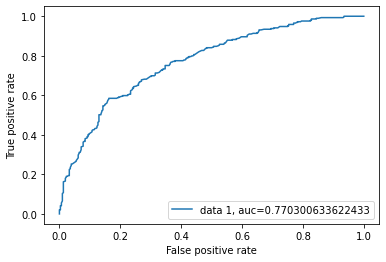

In [74]:
model = RandomForestClassifier(n_estimators=230) 
model.fit(final_train, y_train)

#ROC CURVE - Plotting the true positives against the false positives and an AUC score
y_pred_proba = model.predict_proba(final_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()